In [ ]:
import pandas as pd
import os
import numpy
import matplotlib

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving es.csv to es.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['es.csv']))

In [ ]:
df.head(15)

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,59.166.0.6,149.171.126.3,HTTP,378,GET /announce?peer_id=U74546---B$\\023\\034FSH...
1,2,0.099182,59.166.0.4,149.171.126.8,HTTP,378,GET /announce?peer_id=U74546---B$\\023\\034FSH...
2,3,0.360266,175.45.176.3,149.171.126.13,HTTP,265,GET /demo/ojspext/events/globals.jsa HTTP/1.1
3,4,0.599377,59.166.0.4,149.171.126.4,HTTP,378,GET /announce?peer_id=U74546---B$\\023\\034FSH...
4,5,0.699354,59.166.0.0,149.171.126.0,HTTP,301,GET / HTTP/1.1
5,6,0.899360,59.166.0.2,149.171.126.4,HTTP,378,GET /announce?peer_id=U74546---B$\\023\\034FSH...
6,7,0.904144,59.166.0.6,149.171.126.3,HTTP,309,GET /notthere.html HTTP/1.1
7,8,1.299368,59.166.0.0,149.171.126.4,HTTP,378,GET /announce?peer_id=U74546---B$\\023\\034FSH...
8,9,1.412203,59.166.0.9,149.171.126.9,HTTP,378,GET /announce?peer_id=U74546---B$\\023\\034FSH...
9,10,1.701139,59.166.0.0,149.171.126.0,HTTP,309,GET /notthere.html HTTP/1.1


In [ ]:
df.Info

0       GET /announce?peer_id=U74546---B$\\023\\034FSH...
1       GET /announce?peer_id=U74546---B$\\023\\034FSH...
2          GET /demo/ojspext/events/globals.jsa HTTP/1.1 
3       GET /announce?peer_id=U74546---B$\\023\\034FSH...
4                                         GET / HTTP/1.1 
                              ...                        
2151                         GET /notthere.html HTTP/1.1 
2152                                      GET / HTTP/1.1 
2153                             GET /video.fli HTTP/1.1 
2154                                      GET / HTTP/1.1 
2155                         GET /notthere.html HTTP/1.1 
Name: Info, Length: 2156, dtype: object

In [ ]:
a = df.Info

In [ ]:
a

0       GET /announce?peer_id=U74546---B$\\023\\034FSH...
1       GET /announce?peer_id=U74546---B$\\023\\034FSH...
2          GET /demo/ojspext/events/globals.jsa HTTP/1.1 
3       GET /announce?peer_id=U74546---B$\\023\\034FSH...
4                                         GET / HTTP/1.1 
                              ...                        
2151                         GET /notthere.html HTTP/1.1 
2152                                      GET / HTTP/1.1 
2153                             GET /video.fli HTTP/1.1 
2154                                      GET / HTTP/1.1 
2155                         GET /notthere.html HTTP/1.1 
Name: Info, Length: 2156, dtype: object

(28, 28, 4100)


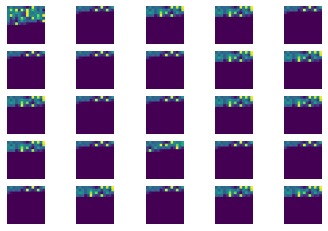

In [ ]:
import binascii
list2=[]
for x in range(a.size):
  msg = binascii.hexlify(a[x].encode())
  d = msg.decode('ASCII')
  msglist = []
  for i in range(len(d)):
    msglist.append(int(d[i],base =16)*16+8)
  if (len(msglist)<196):
    list2.append(msglist)

arr = numpy.array(list2)
arr.shape

dataset = numpy.zeros((28,28,4100))
z=0
for j in list2:
  flag =0
  for i in range(len(j)):
    if ((i)%14==0 and i!=0):
      flag = flag+2
      dataset[flag,0,z] = j[i]
      dataset[flag,1,z] = j[i]
      dataset[flag+1,0,z] = j[i]
      dataset[flag+1,1,z] = j[i]

    else:
      dataset[flag,(i%14)*2,z] = j[i]
      dataset[flag,((i%14)*2)+1,z] = j[i]
      dataset[flag+1,(i%14)*2,z] = j[i]
      dataset[flag+1,((i%14)*2)+1,z] = j[i]
  z=z+1
matplotlib.pyplot.imshow(dataset[:,:,2096])

print(dataset.shape)
data =[]
for i in range(2097):
  data.append(dataset[:,:,i])
data = numpy.array(data)
data.shape

for i in range(25):
	# define subplot
	matplotlib.pyplot.subplot(5, 5, 1 + i)
	# turn off axis
	matplotlib.pyplot.axis('off')
	# plot raw pixel data
	matplotlib.pyplot.imshow(data[i])
matplotlib.pyplot.show()

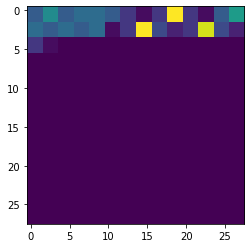

In [ ]:
	matplotlib.pyplot.imshow(data[4])

In [ ]:
data[4]

NameError: ignored

In [ ]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model
from keras.regularizers import l2
 
# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1)):
	model = Sequential()
	model.add(Conv2D(64, (4,4), strides=(2, 2), padding='same', input_shape=in_shape, 
                   kernel_regularizer=l2(0.000025), bias_regularizer=l2(0.000025)))
	model.add(LeakyReLU(alpha=0.2))
	#model.add(Dropout(0.4))
	model.add(Conv2D(64, (4,4), strides=(2, 2), padding='same', 
                  kernel_regularizer=l2(0.000025), bias_regularizer=l2(0.000025)))
	model.add(LeakyReLU(alpha=0.2))
	#model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = Adam(lr=0.0001, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model
 
# define model
#model = define_discriminator()
# summarize the model
#model.summary()

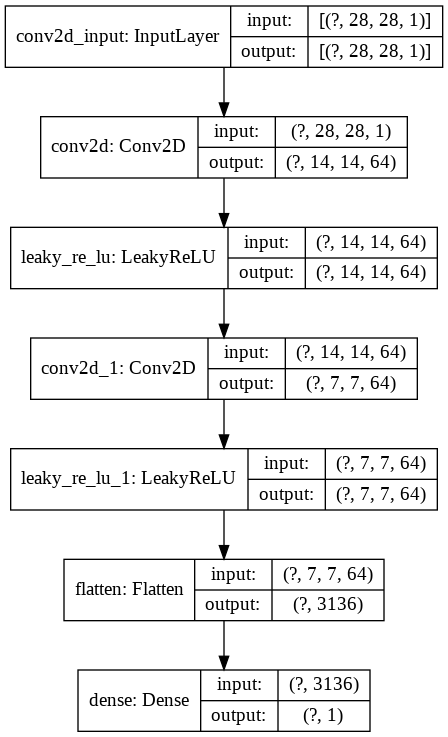

In [ ]:
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
def load_real_samples(data):
	# load dataset
	trainX= data
	# expand to 3d, e.g. add channels dimension
	X = expand_dims(trainX, axis=-1)
	# convert from unsigned ints to floats
	X = X.astype('float32')
	# scale from [0,255] to [0,1]
	X = X / 255.0
	return X

# select real samples
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, 1))
	return X, y

In [ ]:
from numpy import expand_dims
from numpy import ones
from numpy import zeros
from numpy.random import rand
from numpy.random import randint
from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
def generate_fake_samples(n_samples):
	# generate uniform random numbers in [0,1]
	X = rand(28 * 28 * n_samples)
	# reshape into a batch of grayscale images
	X = X.reshape((n_samples, 28, 28, 1))
	# generate 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y

In [ ]:
def train_discriminator(model, dataset, n_iter=150, n_batch=256):
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_iter):
		# get randomly selected 'real' samples
		X_real, y_real = generate_real_samples(dataset, half_batch)
		# update discriminator on real samples
		_, real_acc = model.train_on_batch(X_real, y_real)
		# generate 'fake' examples
		X_fake, y_fake = generate_fake_samples(half_batch)
		# update discriminator on fake samples
		_, fake_acc = model.train_on_batch(X_fake, y_fake)
		# summarize performance
		print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))


In [ ]:
# def load_real_samples1(data):
# 	# load dataset
# 	trainX= data
# 	# expand to 3d, e.g. add channels dimension
# 	X = trainX
# 	# convert from unsigned ints to floats
# 	X = X.astype('float32')
# 	# scale from [0,255] to [0,1]
# 	X = X /255
# 	return X
# dataset2 = load_real_samples1(data)
# for i in range(25):
# 	# define subplot
# 	matplotlib.pyplot.subplot(5, 5, 1 + i)
# 	# turn off axis
# 	matplotlib.pyplot.axis('off')
# 	# plot raw pixel data
# 	matplotlib.pyplot.imshow(dataset2[i] , cmap='gray_r')
# matplotlib.pyplot.show()

In [ ]:
#dataset = load_real_samples(data)
# fit the model
#train_discriminator(model, dataset)

>1 real=89% fake=42%
>2 real=97% fake=84%
>3 real=96% fake=98%
>4 real=95% fake=100%
>5 real=91% fake=100%
>6 real=98% fake=100%
>7 real=94% fake=100%
>8 real=92% fake=100%
>9 real=95% fake=100%
>10 real=91% fake=100%
>11 real=95% fake=100%
>12 real=95% fake=100%
>13 real=98% fake=100%
>14 real=95% fake=100%
>15 real=95% fake=100%
>16 real=94% fake=100%
>17 real=93% fake=100%
>18 real=98% fake=100%
>19 real=96% fake=100%
>20 real=94% fake=100%
>21 real=97% fake=100%
>22 real=97% fake=100%
>23 real=93% fake=100%
>24 real=91% fake=100%
>25 real=97% fake=100%
>26 real=96% fake=100%
>27 real=96% fake=100%
>28 real=95% fake=100%
>29 real=93% fake=100%
>30 real=98% fake=100%
>31 real=98% fake=100%
>32 real=98% fake=100%
>33 real=100% fake=100%
>34 real=98% fake=100%
>35 real=98% fake=100%
>36 real=99% fake=100%
>37 real=99% fake=100%
>38 real=98% fake=100%
>39 real=100% fake=100%
>40 real=98% fake=100%
>41 real=98% fake=100%
>42 real=98% fake=100%
>43 real=100% fake=100%
>44 real=98% fake=10

In [ ]:
# example of defining and using the generator model
from numpy import zeros
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from matplotlib import pyplot

# define the standalone generator model
def define_generator(latent_dim):
  model = Sequential()
  model.add(Dense(1024, input_dim=latent_dim))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dense(12544))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((7, 7, 256)))
	# upsample to 14x14
  model.add(Conv2DTranspose(64, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
	# upsample to 28x28
  model.add(Conv2DTranspose(32, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
  return model

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = g_model.predict(x_input)
	# create 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y

#size of the latent space
# latent_dim = 64
# #define the discriminator model
# model = define_generator(latent_dim)
# #generate samples
# n_samples = 25
# X, _ = generate_fake_samples(model, latent_dim, n_samples)
# #plot the generated samples
# for i in range(n_samples):
# 	#define subplot
# 	pyplot.subplot(5, 5, 1 + i)
# 	# turn off axis labels
# 	pyplot.axis('off')
# 	# plot single image
# 	pyplot.imshow(X[i, :, :, 0], cmap='gray_r')
# # show the figure
# pyplot.show()

In [ ]:
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(g_model)
	# add the discriminator
	model.add(d_model)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

In [ ]:

def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	# save plot
	# save_plot(x_fake, epoch)
	# # save the generator model tile file
	# filename = 'generator_model_%03d.h5' % (epoch + 1)
	# g_model.save(filename)

In [ ]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, y_real = generate_real_samples(dataset, half_batch)
			# generate 'fake' examples
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# create training set for the discriminator
			X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
			# update discriminator model weights
			d_loss, _ = d_model.train_on_batch(X, y)
			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
		# evaluate the model performance, sometimes
		if (i+1) % 1 == 0:
			summarize_performance(i, g_model, d_model, dataset, latent_dim)

In [ ]:
from numpy import vstack
# size of the latent space
latent_dim = 64
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples(data)
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

>1, 1/8, d=0.686, g=0.726
>1, 2/8, d=0.678, g=0.742
>1, 3/8, d=0.671, g=0.758
>1, 4/8, d=0.665, g=0.774
>1, 5/8, d=0.658, g=0.788
>1, 6/8, d=0.654, g=0.801
>1, 7/8, d=0.650, g=0.810
>1, 8/8, d=0.649, g=0.813
>Accuracy real: 92%, fake: 100%
>2, 1/8, d=0.639, g=0.808
>2, 2/8, d=0.656, g=0.790
>2, 3/8, d=0.667, g=0.761
>2, 4/8, d=0.677, g=0.730
>2, 5/8, d=0.686, g=0.710
>2, 6/8, d=0.689, g=0.700
>2, 7/8, d=0.690, g=0.695
>2, 8/8, d=0.691, g=0.692
>Accuracy real: 94%, fake: 2%
>3, 1/8, d=0.694, g=0.689
>3, 2/8, d=0.690, g=0.687
>3, 3/8, d=0.687, g=0.685
>3, 4/8, d=0.688, g=0.683
>3, 5/8, d=0.687, g=0.681
>3, 6/8, d=0.689, g=0.679
>3, 7/8, d=0.688, g=0.677
>3, 8/8, d=0.687, g=0.676
>Accuracy real: 97%, fake: 0%
>4, 1/8, d=0.698, g=0.675
>4, 2/8, d=0.691, g=0.674
>4, 3/8, d=0.689, g=0.673
>4, 4/8, d=0.689, g=0.673
>4, 5/8, d=0.691, g=0.671
>4, 6/8, d=0.689, g=0.670
>4, 7/8, d=0.692, g=0.669
>4, 8/8, d=0.692, g=0.666
>Accuracy real: 94%, fake: 0%
>5, 1/8, d=0.707, g=0.663
>5, 2/8, d=0.697, g=

KeyboardInterrupt: ignored

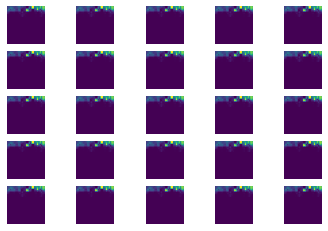

In [ ]:
from numpy.random import randn
from matplotlib import pyplot


def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input
 
# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, n):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :, 0])
	pyplot.show()
 
# load model
model = g_model
# generate images
latent_points = generate_latent_points(64, 25)
# generate images
X = model.predict(latent_points)
# plot the result
save_plot(X, 5)

In [ ]:
X.shape

(25, 28, 28, 1)

In [ ]:
X= X*255

In [ ]:
X

array([[[[1.81088701e-01],
         [2.26205781e-01],
         [2.68420845e-01],
         ...,
         [5.80051124e-01],
         [8.09632421e-01],
         [7.19423711e-01]],

        [[1.89683810e-01],
         [2.13937804e-01],
         [4.02241409e-01],
         ...,
         [4.38759685e-01],
         [8.07355285e-01],
         [7.48862982e-01]],

        [[1.91546291e-01],
         [4.38818634e-01],
         [1.73453316e-01],
         ...,
         [2.72574514e-01],
         [6.87817812e-01],
         [5.68002403e-01]],

        ...,

        [[3.16979094e-05],
         [5.68290079e-06],
         [7.99544637e-07],
         ...,
         [6.52348099e-05],
         [1.15975738e-04],
         [3.70377762e-04]],

        [[6.60552905e-05],
         [3.63329218e-06],
         [1.75492431e-07],
         ...,
         [1.15115909e-05],
         [6.78036085e-05],
         [3.78012686e-04]],

        [[2.51045567e-04],
         [3.07270057e-05],
         [7.44138276e-07],
         ...,
 

In [ ]:
X = X.astype(int)

NameError: ignored

In [ ]:
X

array([[[[6.40251617e+01],
         [4.66728020e+01],
         [1.82347122e+02],
         ...,
         [1.10484123e+02],
         [1.11420395e+02],
         [1.45841919e+02]],

        [[5.31132698e+01],
         [1.11282021e+02],
         [1.48387329e+02],
         ...,
         [8.86758423e+01],
         [5.60067978e+01],
         [1.40313431e+02]],

        [[1.23492638e+02],
         [1.40692200e+02],
         [9.93871002e+01],
         ...,
         [2.02345448e+01],
         [3.92486405e+00],
         [6.82224274e+00]],

        ...,

        [[8.52607097e-03],
         [5.55967353e-03],
         [4.95165887e-06],
         ...,
         [6.84390834e-05],
         [2.60817149e-04],
         [8.31560581e-04]],

        [[8.52160156e-02],
         [1.38028180e-02],
         [1.03682854e-04],
         ...,
         [7.68195787e-06],
         [4.63054239e-05],
         [5.80989756e-04]],

        [[9.28485021e-02],
         [1.39042661e-02],
         [8.17283057e-04],
         ...,
 

In [ ]:
import numpy as np
X = np.random.rand(25,28,28,1)

In [ ]:
X.shape

(25, 28, 28, 1)

In [ ]:
X = X*255
X = X.astype(int)
X= X.reshape(25,28,28)
X

array([[[ 46,  57,  68, ..., 147, 206, 183],
        [ 48,  54, 102, ..., 111, 205, 190],
        [ 48, 111,  44, ...,  69, 175, 144],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[ 46,  59,  69, ..., 147, 204, 182],
        [ 49,  56, 102, ..., 112, 204, 189],
        [ 50, 112,  46, ...,  69, 174, 144],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[ 41,  53,  64, ..., 149, 210, 186],
        [ 43,  50, 100, ..., 112, 210, 195],
        [ 44, 110,  40, ...,  65, 179, 146],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[ 38,  50,  61, ..., 150, 213, 189],
        [ 40,  48,  97, ..., 110, 213, 197],
        [ 42, 109,  38, ...,  62, 183, 149

In [ ]:
X[0]

array([[ 46,  57,  68,  64,  57,  51,  42,  60,  84,  95,  55,  75,  46,
         30,   2,   1,  70,  83, 248, 245, 103, 150, 135, 116, 196, 147,
        206, 183],
       [ 48,  54, 102, 100,  65,  37,  46,  46,  63,  56,  34,  18,  15,
         28,   5,   4, 120,  14, 246, 238,  48, 112, 189, 120, 184, 111,
        205, 190],
       [ 48, 111,  44,  73,  68,  79,  41,  29,  72,  69,   6,   9,  19,
         28, 203, 159,  30,  55,   2,   2,  49,  95, 227,  93,  28,  69,
        175, 144],
       [ 69,  76,  58,  62,  69,  60,  42,  34,  54,  71,   2,   2,  16,
         24, 219, 208,  54,  42,   0,   1,  25,  24,  74,  35,  57,  15,
         49,  92],
       [ 33,  17,   1,   1,   3,   5,   0,   1,   7,   7,  10,  22,   1,
          6,   2,   0,   1,   0,   0,   0,   3,   3,   0,   0,   9,  32,
          9,  28],
       [ 20,   6,   1,   1,   2,   2,   0,   0,   1,  11,   4,  10,   6,
          3,   3,   0,   0,   0,   0,   0,   1,   5,   0,   0,   6,  12,
         14,  14],
       [  

In [ ]:
max1 = max(5,6,4,3,8)
max1
b = ""
b = b + 'a'
b = b + 'G'
b

'aG'

In [ ]:
F= X[0]
F.shape
F= F.reshape(28*28)
j=0
print(F[0])
print(F[1])
print(F[2])
print(F[3])
max1 = max(F[0],F[1],F[2],F[3])
max1

46
57
68
64


68

In [ ]:

for i in range(25):
  Y = X[i].reshape(28*28)
  a = ""
  for j in range(28*28-8):
    max1 = max(Y[j],Y[j+1],Y[j+2],Y[j+3])
    # print("MAX!")
    # print(max1)
    if(max1!=0):
      max1=(max1-8)
    max2 = max(Y[j+4],Y[j+5],Y[j+6],Y[j+7])
    if(max2!=0):
      max2=(max2-8)/16
    
    max1 = max1 + max2
    max1 = max1.astype(int)
    if(max1>250):
      max1=250
    if(max1<=0):
      max1 =32
    #print(max1)
    output = chr(max1)
    #print(output)
    a += output
    j=j+8
  print(a)
  print('\n')

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            


                                                                                                                                                                                                                                                                                                                                

In [ ]:
f = [[ 46,  57,  68,  64,  57,  51,  42,  60,  84,  95,  55,  75,  46,
         30,   2,   1,  70,  83, 248, 245, 103, 150, 135, 116, 196, 147,
        206, 183],
       [ 48,  54, 102, 100,  65,  37,  46,  46,  63,  56,  34,  18,  15,
         28,   5,   4, 120,  14, 246, 238,  48, 112, 189, 120, 184, 111,
        205, 190],
       [ 48, 111,  44,  73,  68,  79,  41,  29,  72,  69,   6,   9,  19,
         28, 203, 159,  30,  55,   2,   2,  49,  95, 227,  93,  28,  69,
        175, 144],
       [ 69,  76,  58,  62,  69,  60,  42,  34,  54,  71,   2,   2,  16,
         24, 219, 208,  54,  42,   0,   1,  25,  24,  74,  35,  57,  15,
         49,  92],
       [ 33,  17,   1,   1,   3,   5,   0,   1,   7,   7,  10,  22,   1,
          6,   2,   0,   1,   0,   0,   0,   3,   3,   0,   0,   9,  32,
          9,  28],
       [ 20,   6,   1,   1,   2,   2,   0,   0,   1,  11,   4,  10,   6,
          3,   3,   0,   0,   0,   0,   0,   1,   5,   0,   0,   6,  12,
         14,  14],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   1,   8,  12,   8,
          1,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   2,   8,
          5,   1],
       [  2,   0,   0,   0,   0,   1,   0,   0,   1,   0,   6,  14,   0,
          3,   0,   0,   0,   0,   0,   0,   1,   2,   0,   0,   6,  10,
          1,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]]

In [ ]:
f.shape

AttributeError: ignored

In [ ]:
import numpy as np
arr = np.array(f)

In [ ]:
arr.shape

(28, 28)

In [ ]:
arr = arr.reshape(28*28)

In [ ]:
arr.shape

(784,)

In [ ]:
arr
Y = arr

In [ ]:
a = ""
for j in range(0,28*28-8,8):
  #print(j)
  max1 = max(Y[j],Y[j+1],Y[j+2],Y[j+3])
  # print("MAX!")
  # print(max1)
  if(max1!=0):
    max1=(max1-8)
  max2 = max(Y[j+4],Y[j+5],Y[j+6],Y[j+7])
  if(max2!=0):
    max2=(max2-8)/16
  
  max1 = max1 + max2
  max1 = max1.astype(int)

  
  if(max1<=0):
    max1 =32
  print(max1)
  output = chr(max1)
  #print(output)
  a += output
  print(a)

63
?
89
?Y
248
?Yø
203
?YøË
60
?YøË<
34
?YøË<"
193
?YøË<"Á
107
?YøË<"Ák
76
?YøË<"ÁkL
60
?YøË<"ÁkL<
171
?YøË<"ÁkL<«
64
?YøË<"ÁkL<«@
213
?YøË<"ÁkL<«@Õ
71
?YøË<"ÁkL<«@ÕG
24
?YøË<"ÁkL<«@ÕG
13
?YøË<"ÁkL<«@ÕG
32
 
24
 
32
  
32
   
32
    
32
     
4
     
32
      
32
       
32
        
32
         
32
          
32
           
32
            
32
             
32
              
32
               
32
                
32
                 
32
                  
32
                   
32
                    
32
                     
32
                      
32
                       
32
                        
32
                         
32
                          
32
                           
32
                            
32
                             
32
                              
32
                               
32
                                
32
                                 
32
                     